In [92]:
!pip install openpyxl

In [93]:
import pandas as pd
data = pd.read_excel('app_data.xlsx')
data.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
2,14.34,14.9,male,174.0,45.5,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.87,15.7,male,147.0,34.0,2.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.98,19.7,female,164.0,53.0,4.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ovarialzyste


In [94]:
data_demographc = data[['Age','BMI','Sex','Height','Weight','Management','Severity','Diagnosis','Length_of_Stay']]
data_demographc.head(10)

,Age,BMI,Sex,Height,Weight,Management,Severity,Diagnosis,Length_of_Stay
0,12.68,16.9,female,148.0,37.0,conservative,uncomplicated,appendicitis,3.0
1,11.08,16.9,female,163.0,45.0,conservative,uncomplicated,appendicitis,3.0
2,14.34,14.9,male,174.0,45.5,conservative,uncomplicated,appendicitis,3.0
3,11.87,15.7,male,147.0,34.0,conservative,uncomplicated,appendicitis,2.0
4,15.98,19.7,female,164.0,53.0,conservative,uncomplicated,appendicitis,4.0
5,13.39,17.5,female,153.0,40.7,conservative,uncomplicated,appendicitis,3.0
6,17.24,33.1,female,163.0,88.0,conservative,uncomplicated,appendicitis,3.0
7,10.58,18.6,female,152.0,43.0,conservative,uncomplicated,appendicitis,3.0
8,16.66,21.5,male,174.0,65.0,conservative,uncomplicated,appendicitis,5.0
9,13.26,24.2,female,160.0,62.0,conservative,uncomplicated,appendicitis,2.0


In [95]:
data_demographc.describe()

,Age,BMI,Height,Weight,Length_of_Stay
count,781.000000,755.000000,756.000000,779.000000,778.000000
mean,11.346483,18.906916,148.017460,43.172542,4.284062
std,3.529979,4.385252,19.732016,17.390984,2.574057
min,0.000000,7.827983,53.000000,3.960000,1.000000
25%,9.200000,15.725294,137.000000,29.500000,3.000000
50%,11.438741,18.062284,149.650000,41.400000,3.000000
75%,14.099932,21.179011,163.000000,54.000000,5.000000
max,18.360000,38.156221,192.000000,103.000000,28.000000


In [96]:
data_demographc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             781 non-null    float64
 1   BMI             755 non-null    float64
 2   Sex             780 non-null    object 
 3   Height          756 non-null    float64
 4   Weight          779 non-null    float64
 5   Management      781 non-null    object 
 6   Severity        781 non-null    object 
 7   Diagnosis       780 non-null    object 
 8   Length_of_Stay  778 non-null    float64
dtypes: float64(5), object(4)
memory usage: 55.2+ KB


In [97]:
data_demographc.isnull().sum()

Age                2
BMI               28
Sex                3
Height            27
Weight             4
Management         2
Severity           2
Diagnosis          3
Length_of_Stay     5
dtype: int64

In [98]:
missing_pattern = data_demographc.isnull().any(axis=1)
print(f"A total of {missing_pattern.sum()} patients had at least one record missing")

A total of 32 patients had at least one record missing


In [99]:
complete_cases = data_demographc.dropna()
print(f"The number of patients was recorded completely: {len(complete_cases)}/{len(data_demographc)} ({(len(complete_cases)/len(data_demographc))*100:.1f}%)")

The number of patients was recorded completely: 751/783 (95.9%)


In [100]:
# complete_cases['Sex'] = complete_cases['Sex'].map({'0':'female',1:'male'})

# Univariate analysis: variable distribution characteristics and outlier detection


=== Age distribution analysis ===
count    751.000000
mean      11.339458
std        3.511285
min        0.000000
25%        9.250000
50%       11.436003
75%       13.983840
max       17.872690
Name: Age, dtype: float64


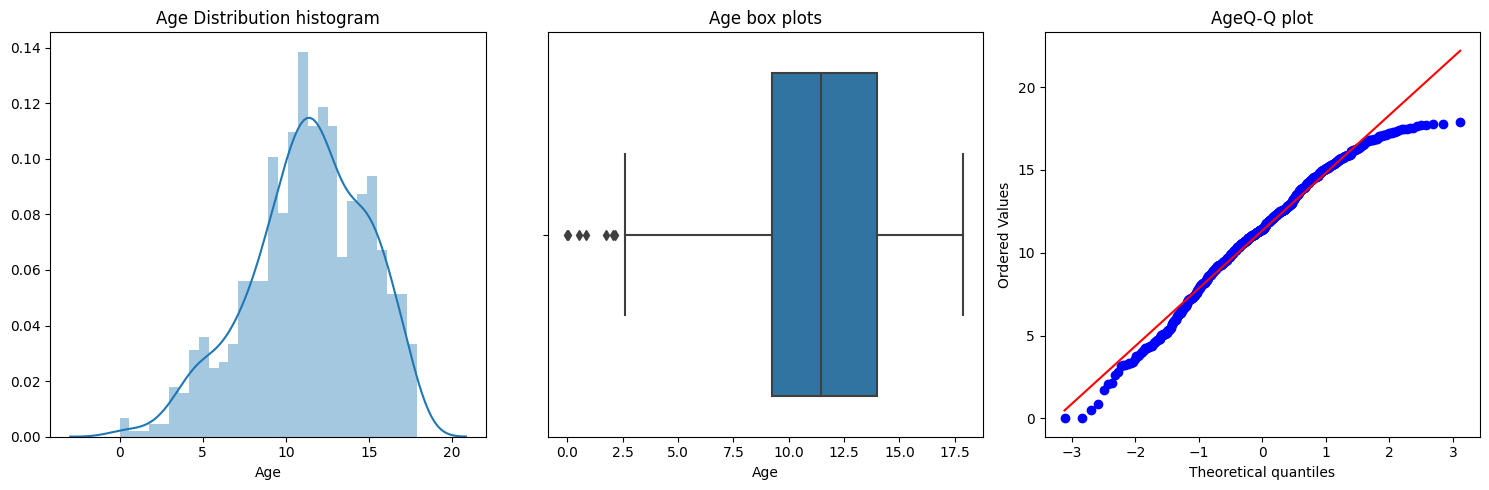

7 Potential outliers (based on IQR method)
279    2.060000
321    0.533881
338    0.000000
358    0.035592
401    2.132786
643    1.727584
718    0.850000
Name: Age, dtype: float64

=== BMI distribution analysis ===
count    751.000000
mean      18.924202
std        4.385148
min        7.827983
25%       15.736632
50%       18.078512
75%       21.196371
max       38.156221
Name: BMI, dtype: float64


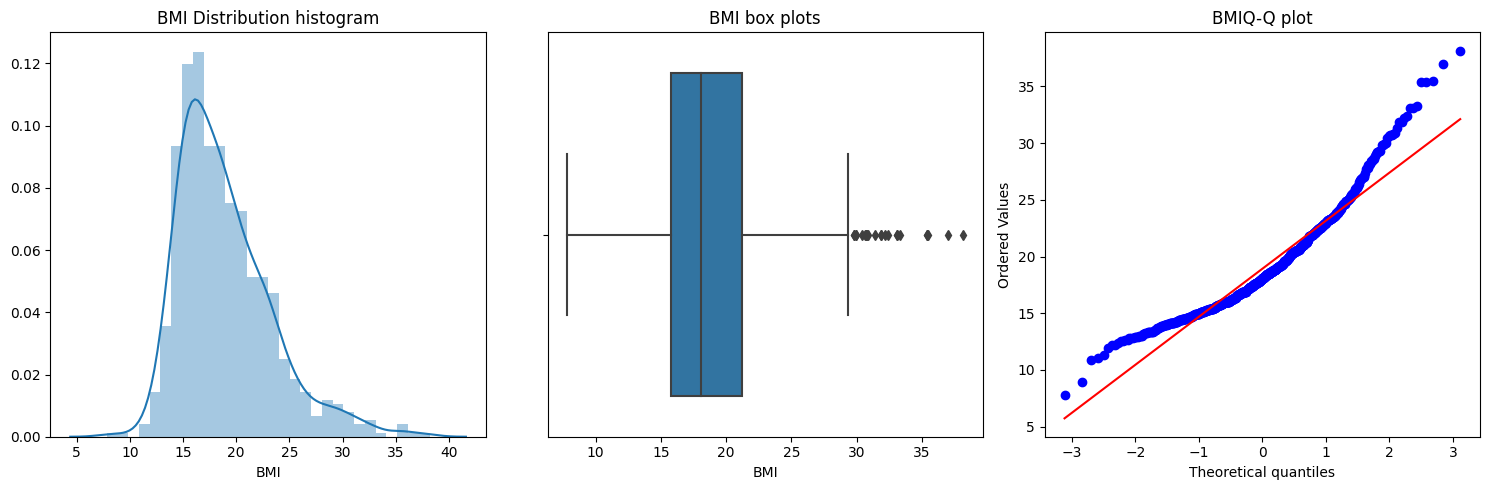

23 Potential outliers (based on IQR method)
6      33.100000
26     30.800000
127    29.937747
164    35.379813
189    35.490000
194    31.380000
217    29.980000
229    33.080000
307    32.183644
319    38.156221
407    31.841831
464    31.900000
467    30.700000
492    37.000000
500    33.300000
502    29.800000
539    29.800000
591    35.400000
668    30.629251
696    30.863007
709    30.726644
727    32.373114
768    30.435091
Name: BMI, dtype: float64

=== Height distribution analysis ===
count    751.000000
mean     148.037550
std       19.705744
min       53.000000
25%      137.000000
50%      149.500000
75%      163.000000
max      192.000000
Name: Height, dtype: float64


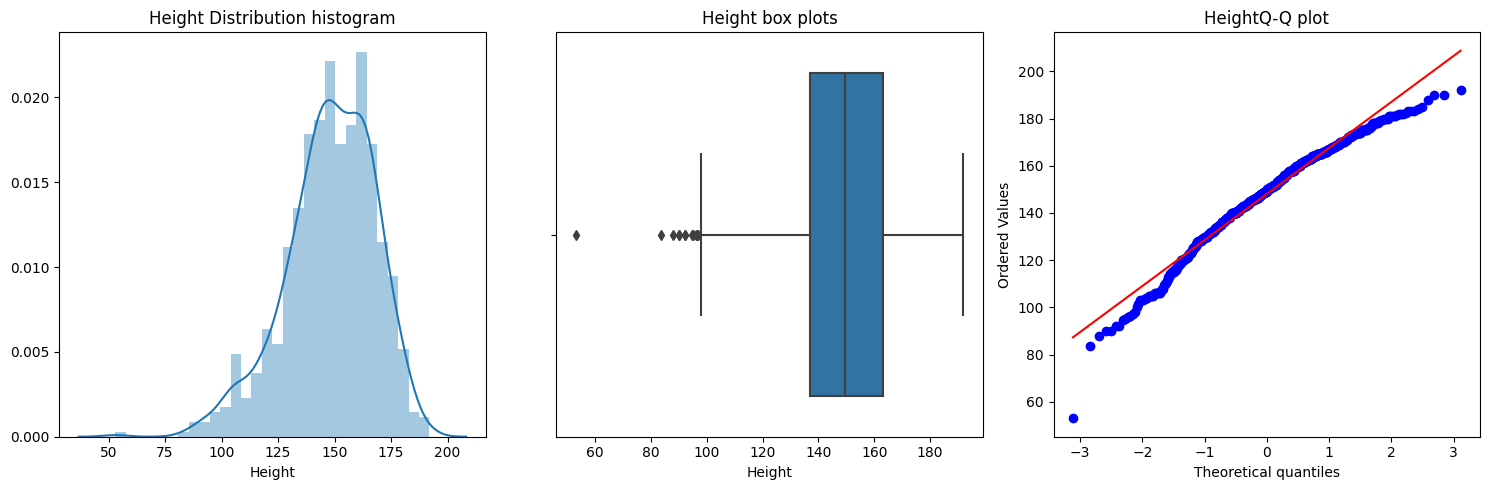

12 Potential outliers (based on IQR method)
62     87.7
209    92.0
214    97.0
264    92.0
279    90.0
316    95.0
358    53.0
401    90.0
445    96.3
543    96.0
643    83.5
712    94.6
Name: Height, dtype: float64

=== Weight distribution analysis ===
count    751.000000
mean      43.344621
std       17.443136
min        3.960000
25%       30.000000
50%       41.400000
75%       55.000000
max      103.000000
Name: Weight, dtype: float64


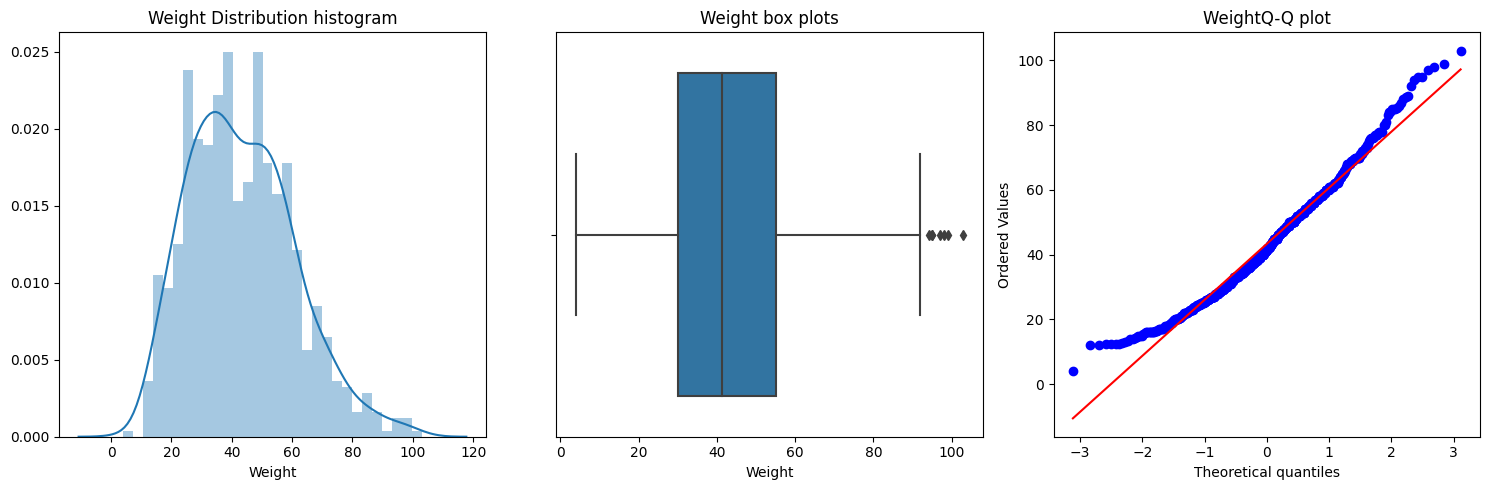

7 Potential outliers (based on IQR method)
26     103.0
194     95.0
217     95.0
229     99.0
307     98.0
452     94.1
492     97.0
Name: Weight, dtype: float64

=== Length_of_Stay distribution analysis ===
count    751.000000
mean       4.287617
std        2.591235
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max       28.000000
Name: Length_of_Stay, dtype: float64


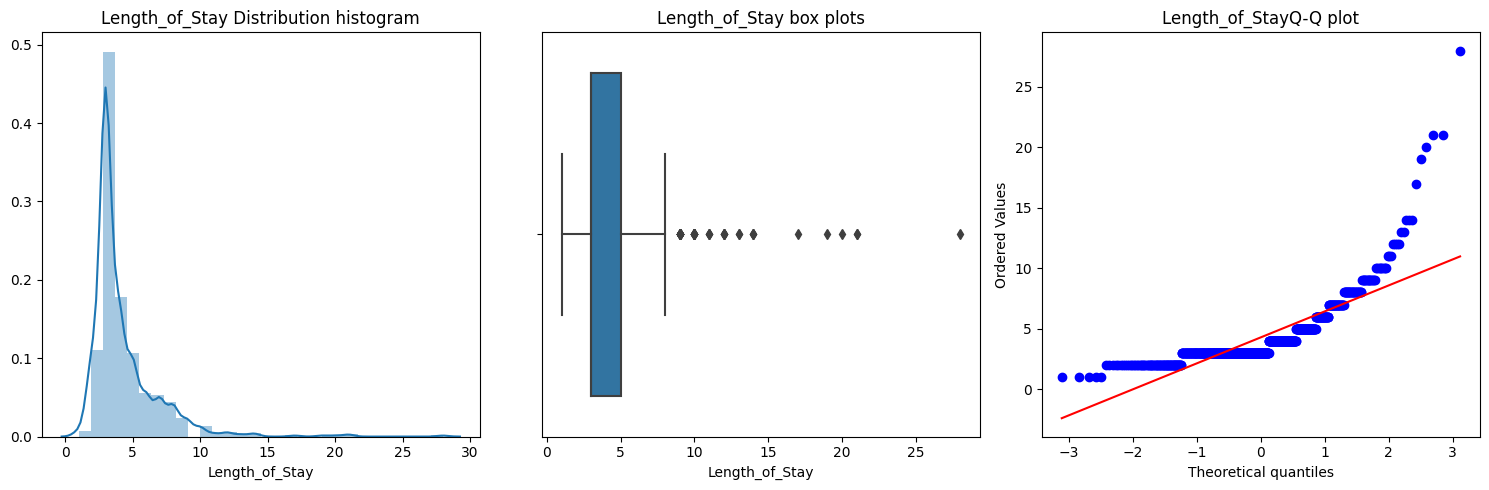

43 Potential outliers (based on IQR method)
174    11.0
183     9.0
189    13.0
208    20.0
209    13.0
211     9.0
222    19.0
229    21.0
230    12.0
231    14.0
240     9.0
244    12.0
245     9.0
246     9.0
247    14.0
250    12.0
258    10.0
259    10.0
264    10.0
279     9.0
284     9.0
313    21.0
316     9.0
326    17.0
330    10.0
336    14.0
346     9.0
350     9.0
358    12.0
372     9.0
374    10.0
378    11.0
388    10.0
397    28.0
402     9.0
405    10.0
413    10.0
422    10.0
424     9.0
425     9.0
452     9.0
542     9.0
778    11.0
Name: Length_of_Stay, dtype: float64


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
numeric_vars = ['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay']
def analyze_numeric_distribution(data, variables):
    data_copy = data.copy()
    for var in variables:
        print(f"\n=== {var} distribution analysis ===")
        print(data_copy[var].describe())

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        sns.distplot(data_copy[var].dropna(), kde=True, bins=30)
        plt.title(f'{var} Distribution histogram')

        plt.subplot(1, 3, 2)
        sns.boxplot(x=data_copy[var])
        plt.title(f'{var} box plots')

        plt.subplot(1, 3, 3)
        from scipy import stats
        stats.probplot(data_copy[var].dropna(), plot=plt)
        plt.title(f'{var}Q-Q plot')

        plt.tight_layout()
        plt.show()

        q1 = data_copy[var].quantile(0.25)
        q3 = data_copy[var].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outliers = data_copy[(data_copy[var] < lower_bound) | (data_copy[var] > upper_bound)]
        print(f"{len(outliers)} Potential outliers (based on IQR method)")
        if len(outliers) > 0:
            print(outliers[var])
            # sorted_outliers = outliers.sort_values(by=var)
            # n_extreme = max(1, int(len(sorted_outliers)*0.1))
            # print("\nMinimum 10% outliers:")
            # print(sorted_outliers.head(n_extreme)[[var]])
            #
            # print("\nThe top 10% outliers")
            # print(sorted_outliers.tail(n_extreme)[[var]])

analyze_numeric_distribution(complete_cases, numeric_vars)

In [102]:
data = complete_cases[complete_cases['Age'] > 0]

In [103]:
data.shape

(750, 9)

In [104]:
categorical_vars = ['Sex', 'Management', 'Severity', 'Diagnosis']


=== Sex distribution analysis ===
frequency distribution:
male      385
female    365
Name: Sex, dtype: int64

Percentage distribution:
male      51.333333
female    48.666667
Name: Sex, dtype: float64


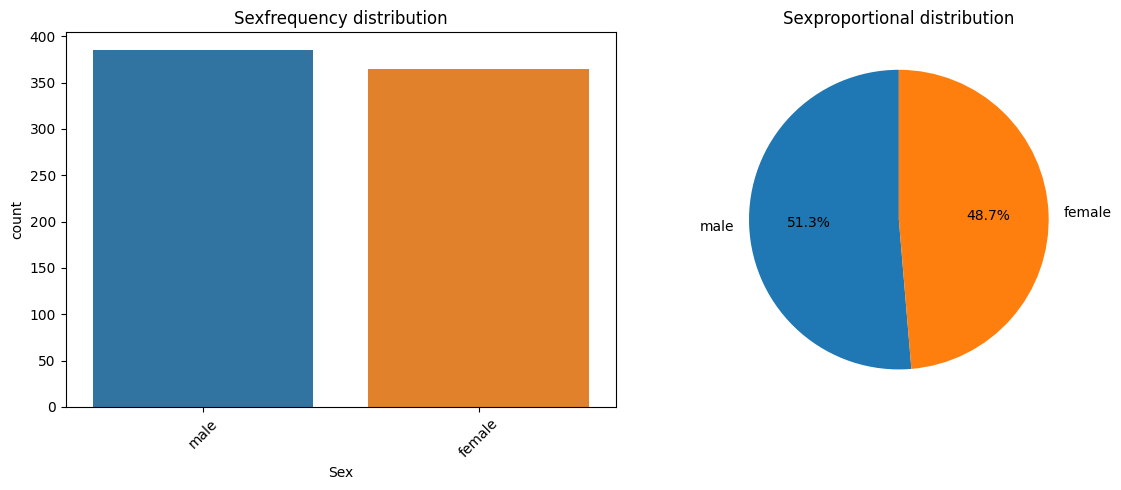


=== Management distribution analysis ===
frequency distribution:
conservative                 468
primary surgical             260
secondary surgical            21
simultaneous appendectomy      1
Name: Management, dtype: int64

Percentage distribution:
conservative                 62.400000
primary surgical             34.666667
secondary surgical            2.800000
simultaneous appendectomy     0.133333
Name: Management, dtype: float64


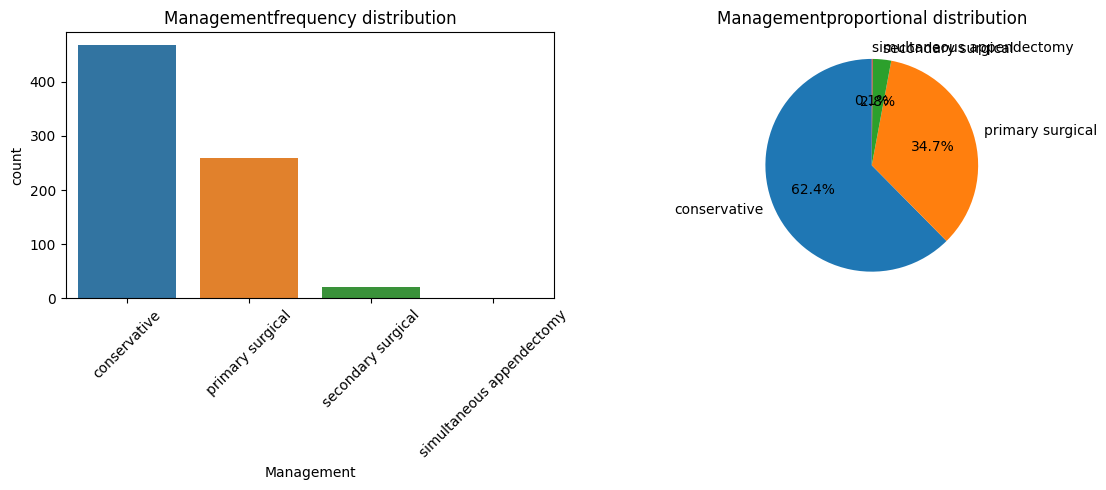


=== Severity distribution analysis ===
frequency distribution:
uncomplicated    636
complicated      114
Name: Severity, dtype: int64

Percentage distribution:
uncomplicated    84.8
complicated      15.2
Name: Severity, dtype: float64


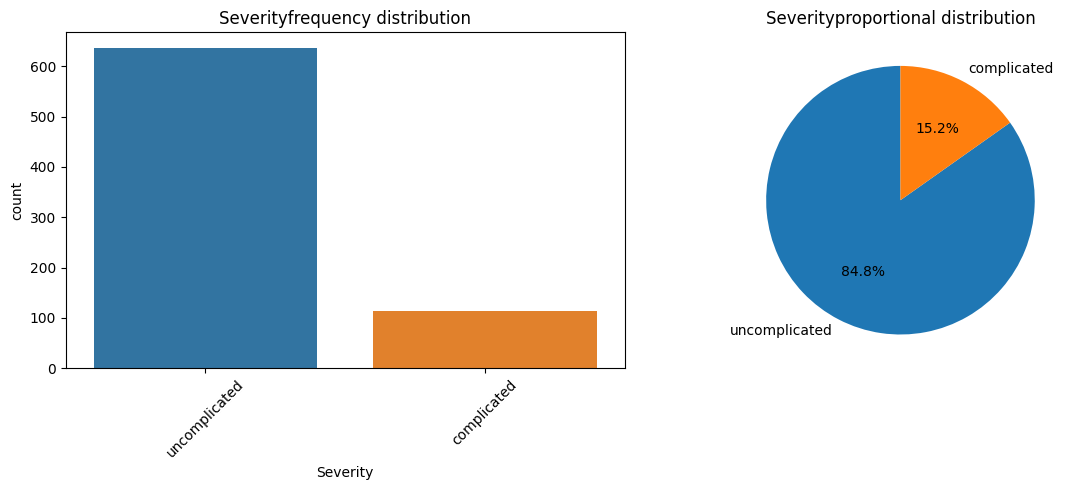


=== Diagnosis distribution analysis ===
frequency distribution:
appendicitis       439
no appendicitis    311
Name: Diagnosis, dtype: int64

Percentage distribution:
appendicitis       58.533333
no appendicitis    41.466667
Name: Diagnosis, dtype: float64


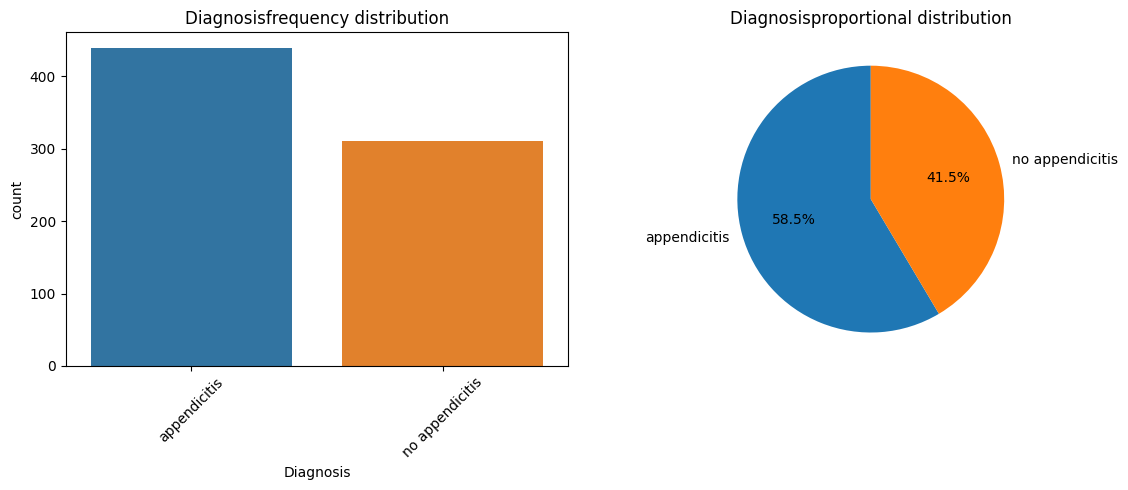

In [105]:
def analyze_categorical_distribution(data, variables):
    for var in variables:
        print(f"\n=== {var} distribution analysis ===")

        freq = data[var].value_counts(dropna=False)
        print("frequency distribution:")
        print(freq)

        print("\nPercentage distribution:")
        print(freq / len(data) * 100)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.countplot(x=var, data=data, order=data[var].value_counts().index)
        plt.title(f'{var}frequency distribution')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        data[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.ylabel('')
        plt.title(f'{var}proportional distribution')

        plt.tight_layout()
        plt.show()


analyze_categorical_distribution(data, categorical_vars)

# bivariate analysis

In [107]:
num_cols = ['Age','BMI','Height','Weight','Length_of_Stay']

Patient Characteristics vs. Diagnosis (Diagnosis)


=== Age Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

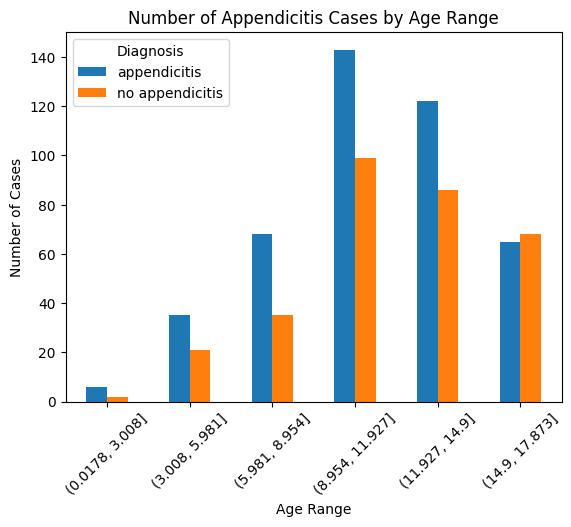

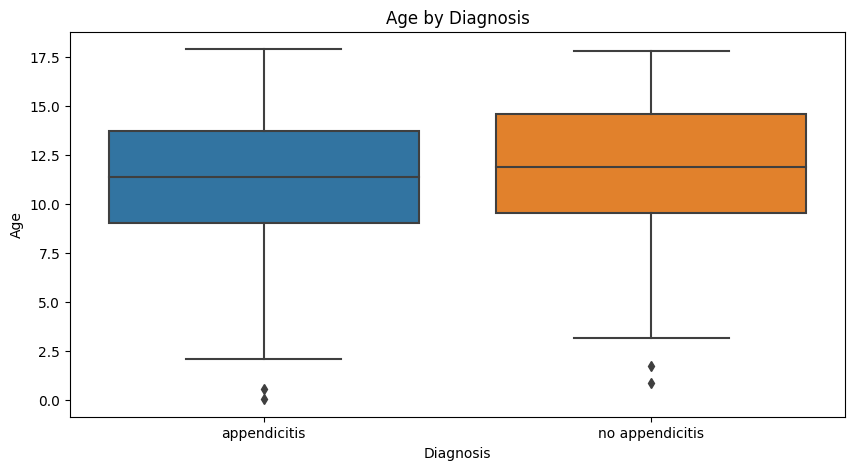


=== BMI Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

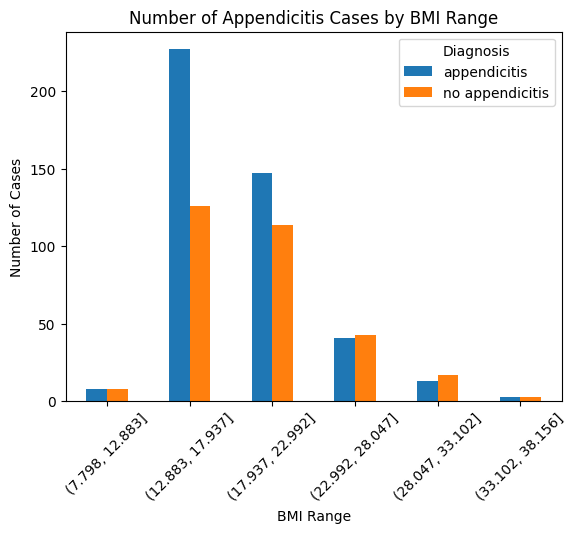

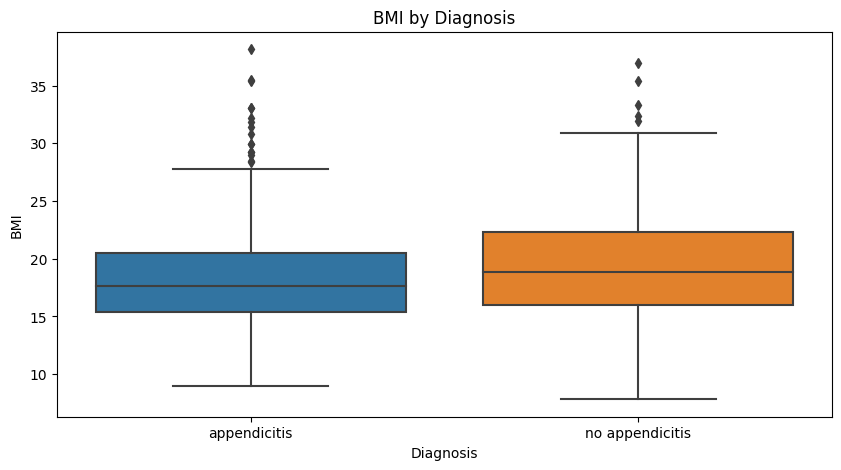


=== Height Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

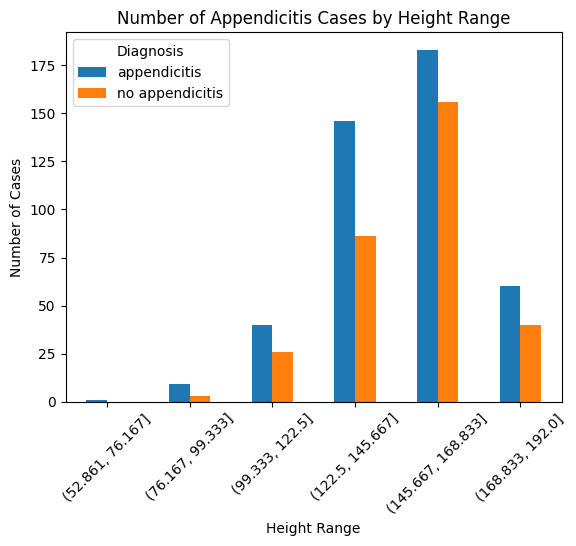

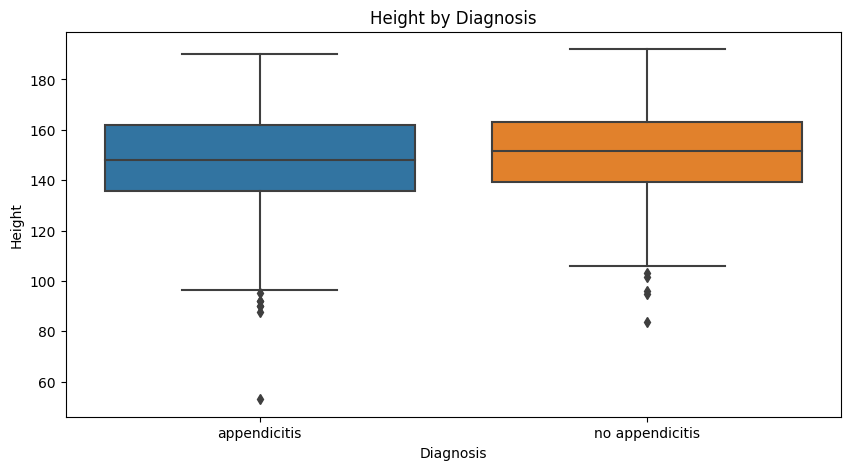


=== Weight Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

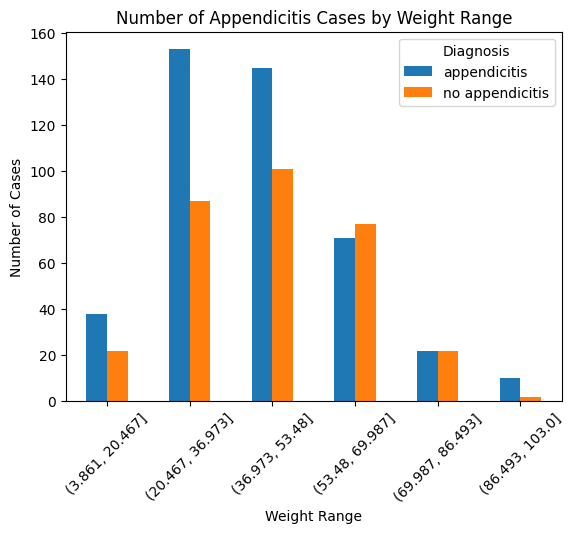

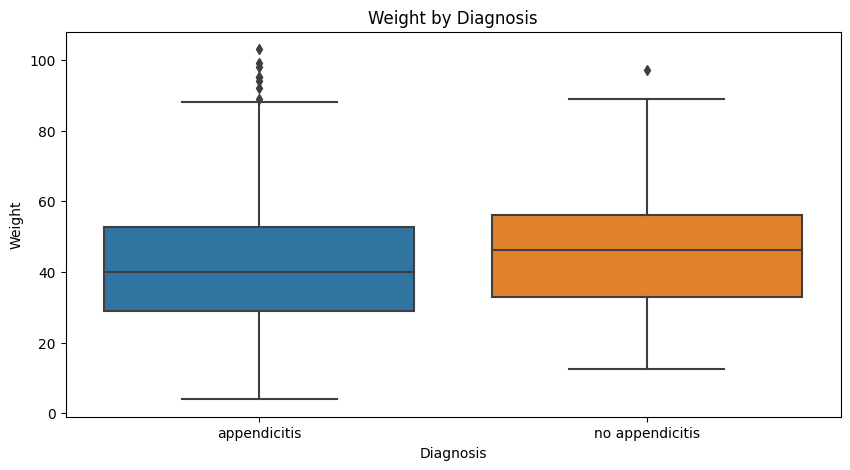


=== Length_of_Stay Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

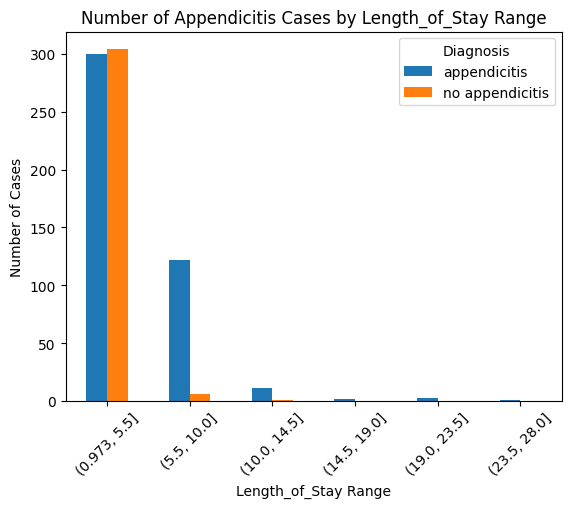

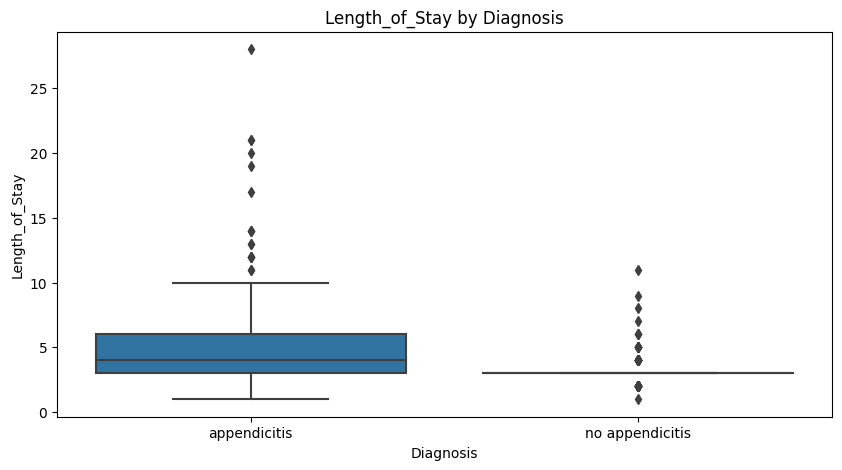

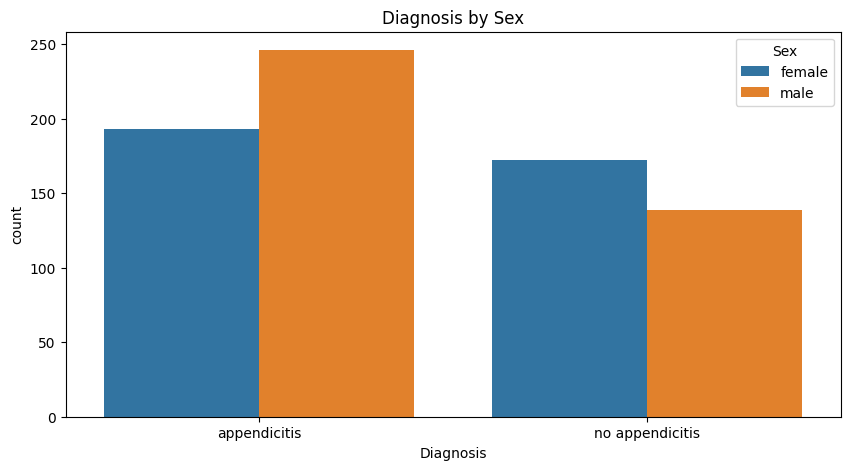

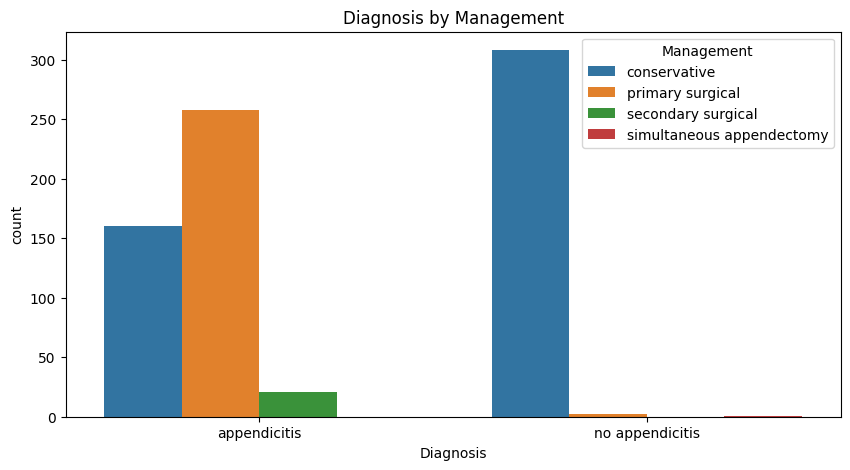

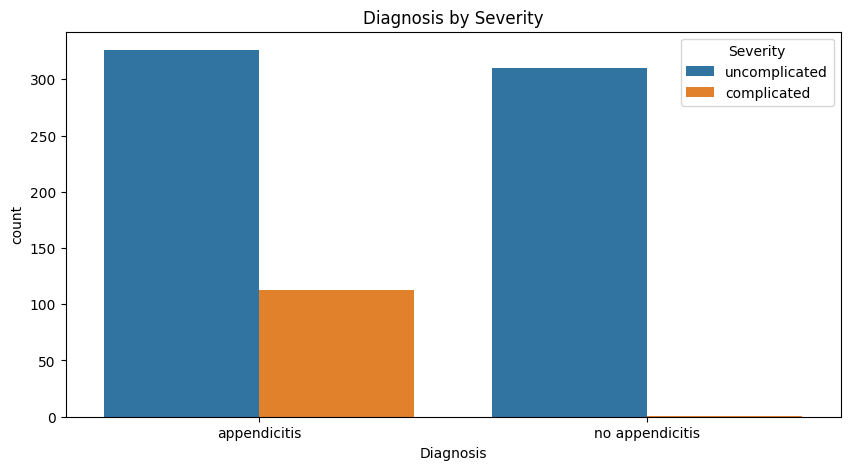

In [110]:

for num in num_cols:
    print(f"\n=== {num} Segmented analysis ===")
    data_copy = data.copy()
    data_copy[f'{num}_bin'] = pd.cut(data_copy[num], bins=6)
    counts = data_copy.groupby([f'{num}_bin', 'Diagnosis']).size().unstack().fillna(0)
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Number of Appendicitis Cases by {num} Range')
    plt.xlabel(f'{num} Range')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.legend(title='Diagnosis')
    plt.show()
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Diagnosis', y=num, data=data)
    plt.title(f'{num} by Diagnosis')
    plt.show()
    #print("：\n", age_counts)
    # disease_rate = data.groupby(f'{num}_bin')['has_disease'].mean().reset_index()
    # disease_rate.columns = [f'{num}_bin', f'{num}_mid,'disease_rate']
    #
    # plt.figure(figsize=(14, 6))
    #
    # plt.subplot(1, 2, 1)
    # sns.distplot(data[num], bins=8, kde=True)
    #
    # plt.figure(figsize=(10, 5))
    # sns.lineplot(x=f'{num}_mid', y='has_disease', data=disease_rate, marker='o')
    # plt.ylabel('morbidity')
    # plt.xlabel(f'{num} (mid)')
    # plt.tight_layout()
    # plt.show()
    #
    # data.drop(f'{num}_bin', axis=1, inplace=True)
    # data.drop(f'{num}_min', axis=1, inplace=True)

for cat in ['Sex','Management','Severity']:
    plt.figure(figsize=(10,5))
    sns.countplot(x='Diagnosis', hue=cat, data=data)
    plt.title(f'Diagnosis by {cat}')
    plt.show()

Patient Characteristics vs. Treatment (Management)


=== Age Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

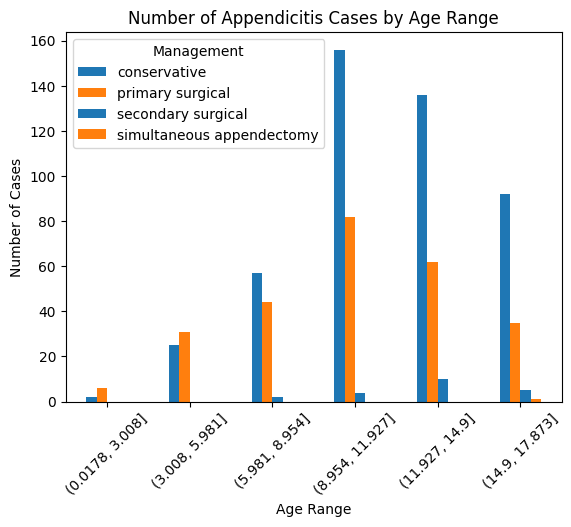

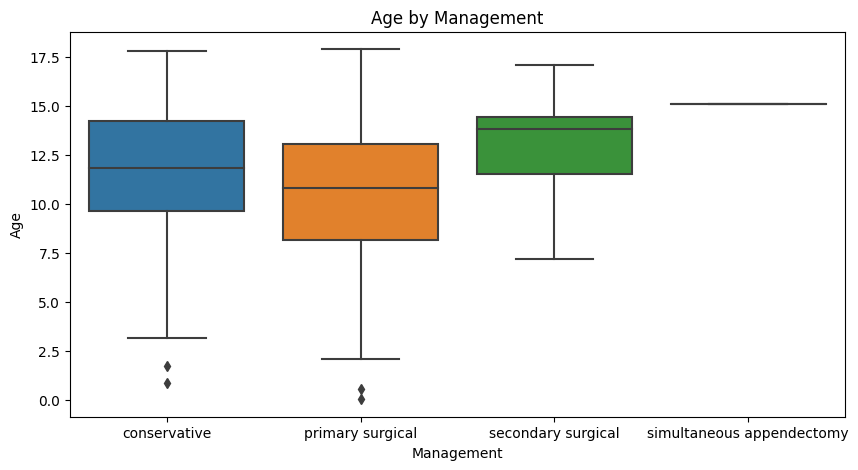


=== BMI Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

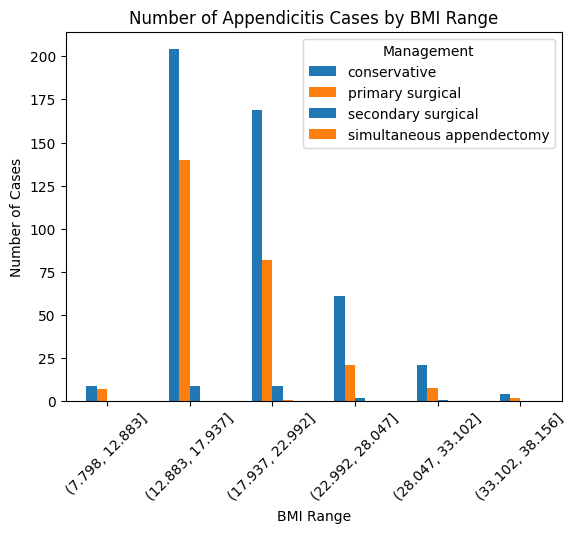

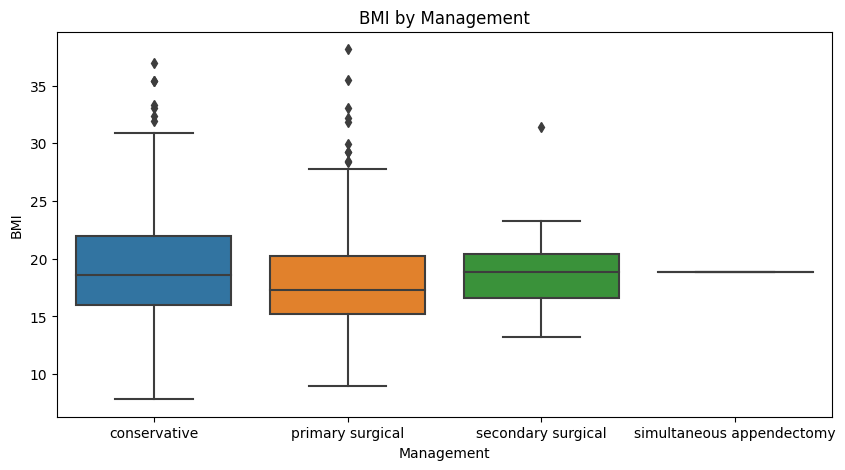


=== Height Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

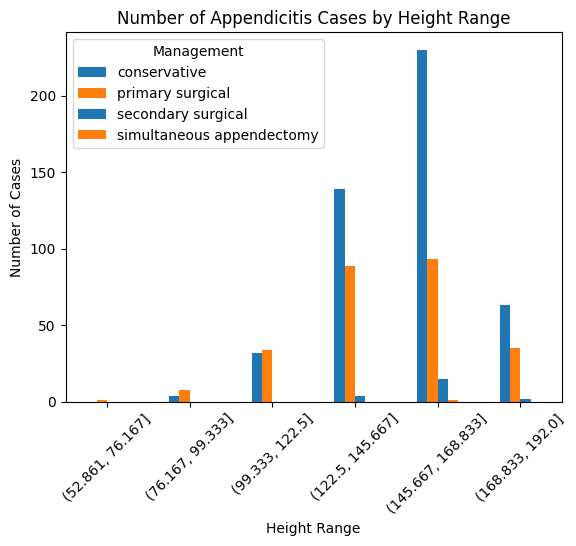

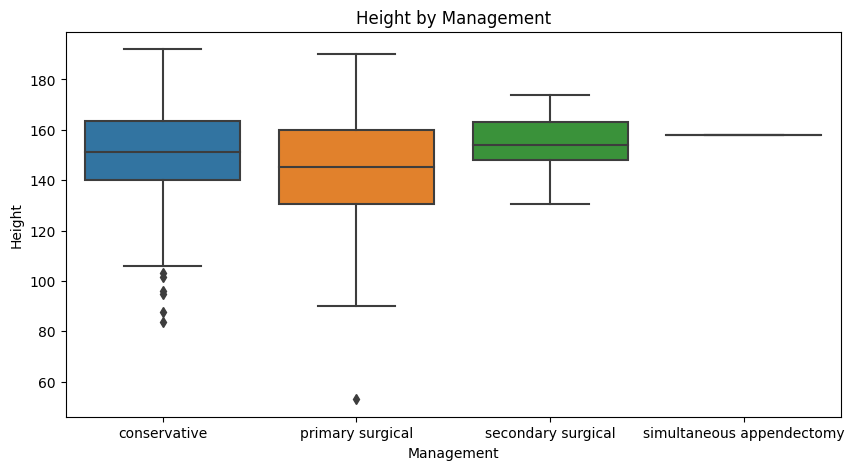


=== Weight Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

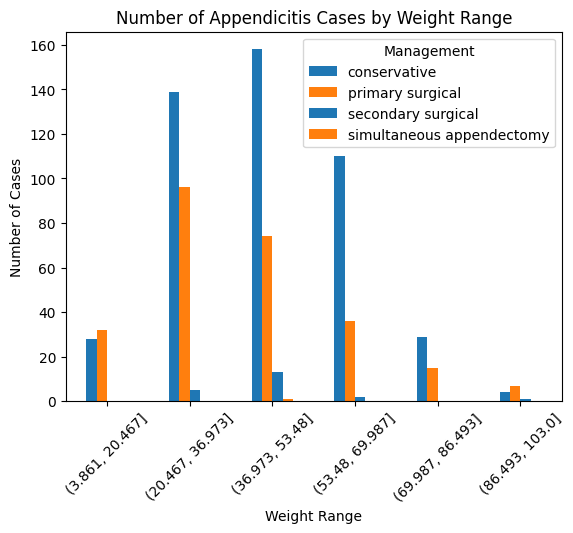

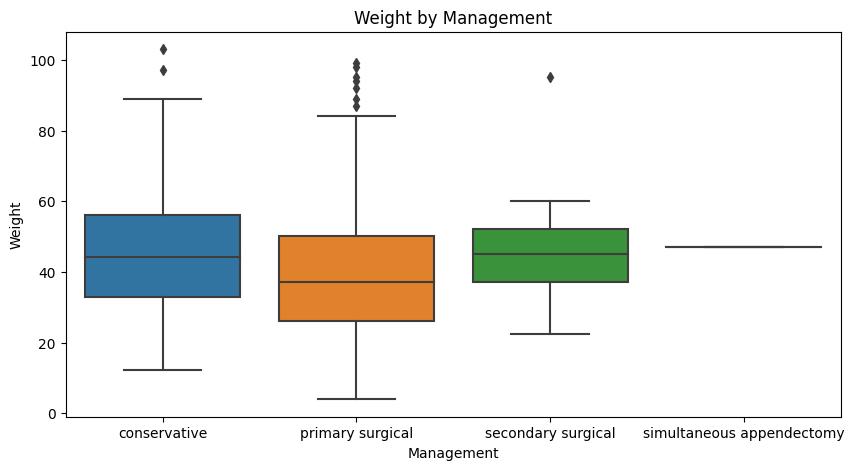


=== Length_of_Stay Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

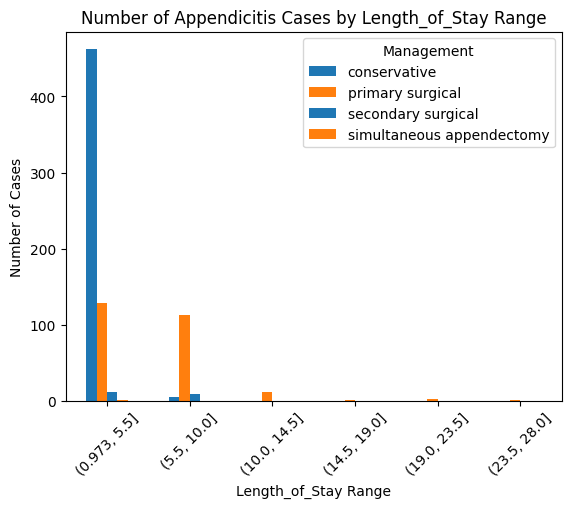

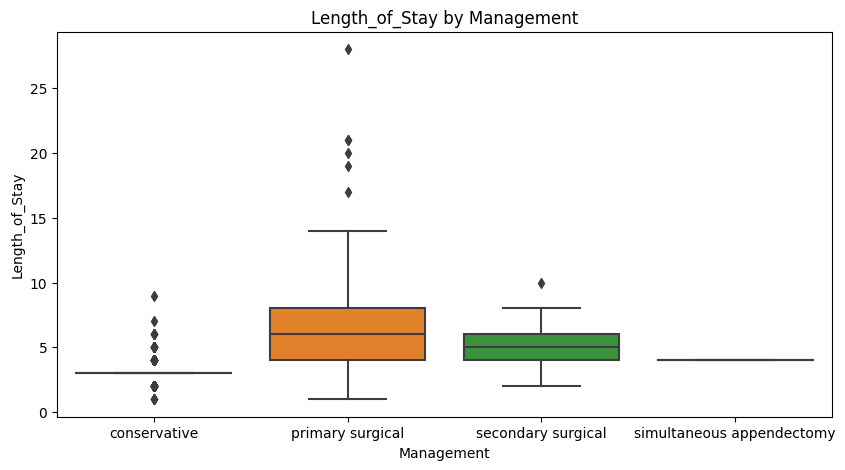

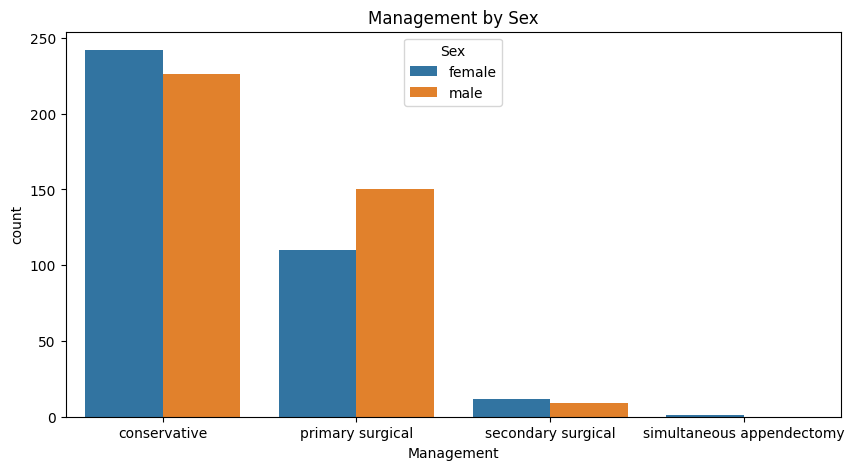

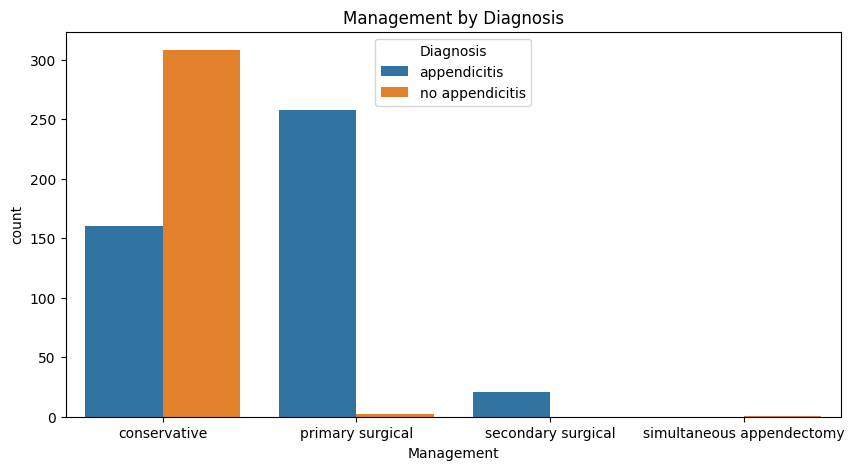

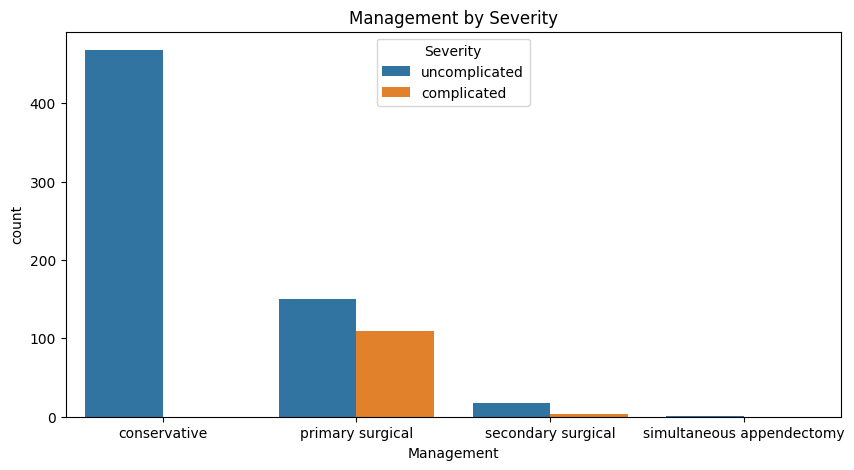

In [111]:
num_cols = ['Age','BMI','Height','Weight','Length_of_Stay']
for num in num_cols:
    print(f"\n=== {num} Segmented analysis ===")
    data_copy = data.copy()
    data_copy.loc[:,f'{num}_bin'] = pd.cut(data_copy[num], bins=6)
    counts = data_copy.groupby([f'{num}_bin', 'Management']).size().unstack().fillna(0)
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Number of Appendicitis Cases by {num} Range')
    plt.xlabel(f'{num} Range')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.legend(title='Management')
    plt.show()
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Management', y=num, data=data)
    plt.title(f'{num} by Management')
    plt.show()


for cat in ['Sex','Diagnosis' ,'Severity']:
    plt.figure(figsize=(10,5))
    sns.countplot(x='Management', hue=cat, data=data)
    plt.title(f'Management by {cat}')
    plt.show()

Patient characteristics vs. Complexity Appendicitis (Severity)


=== Age Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

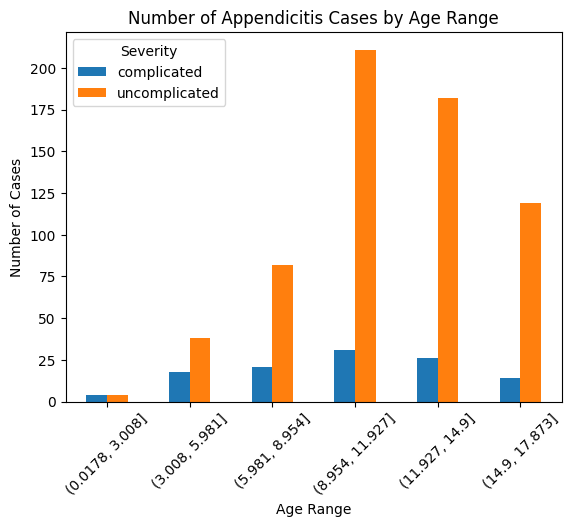

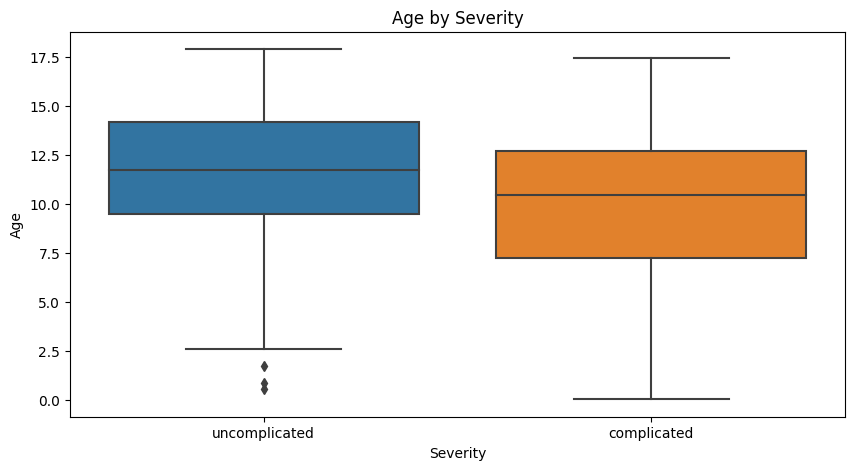


=== BMI Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

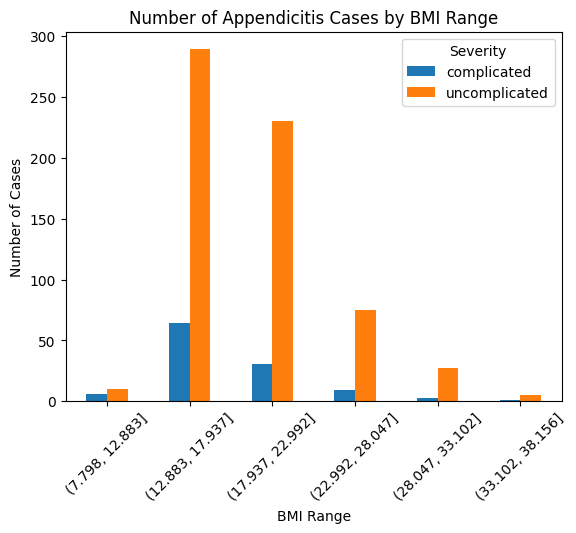

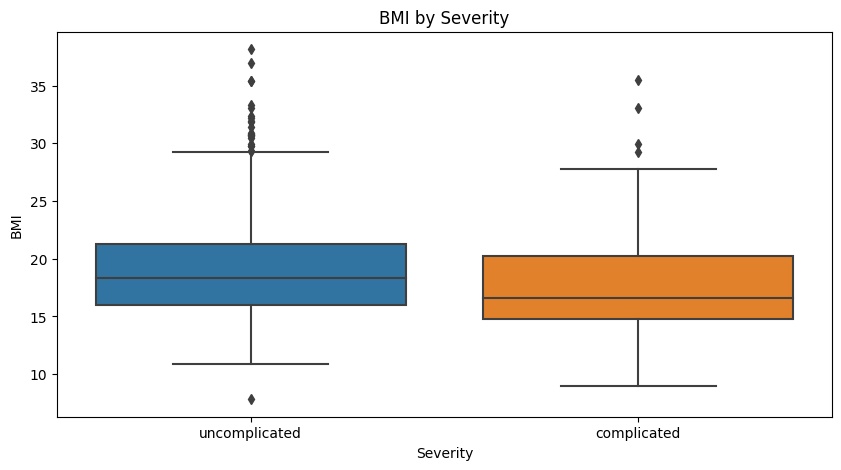


=== Height Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

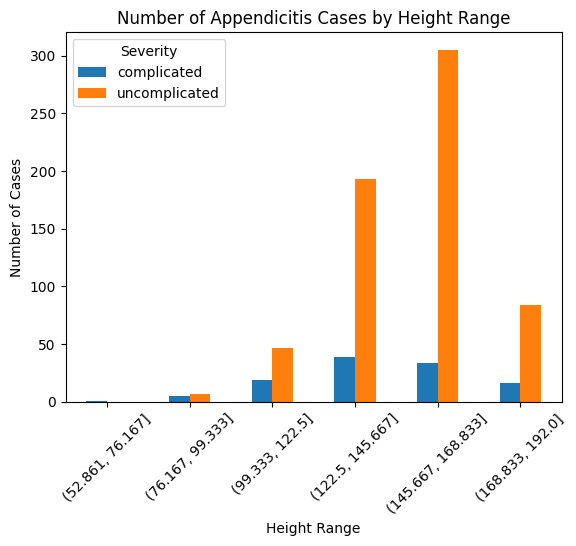

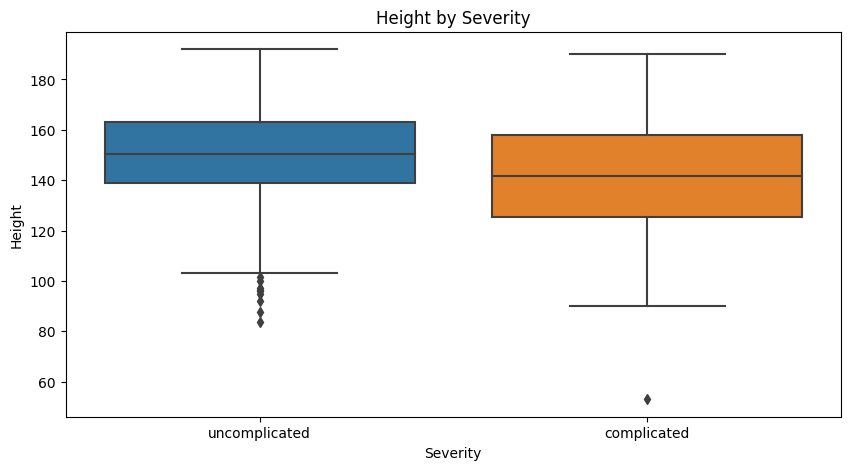


=== Weight Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

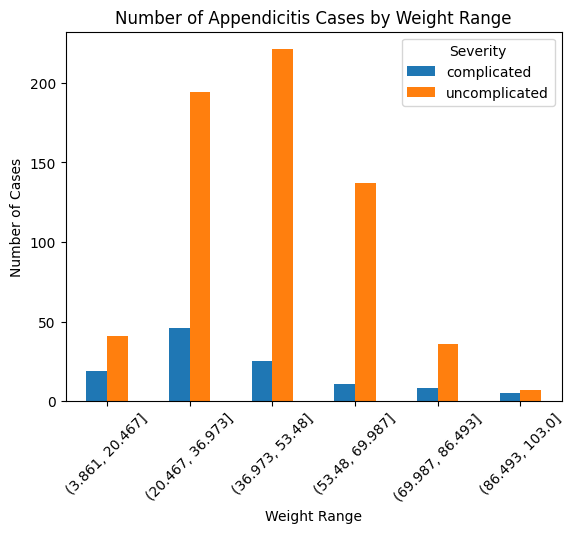

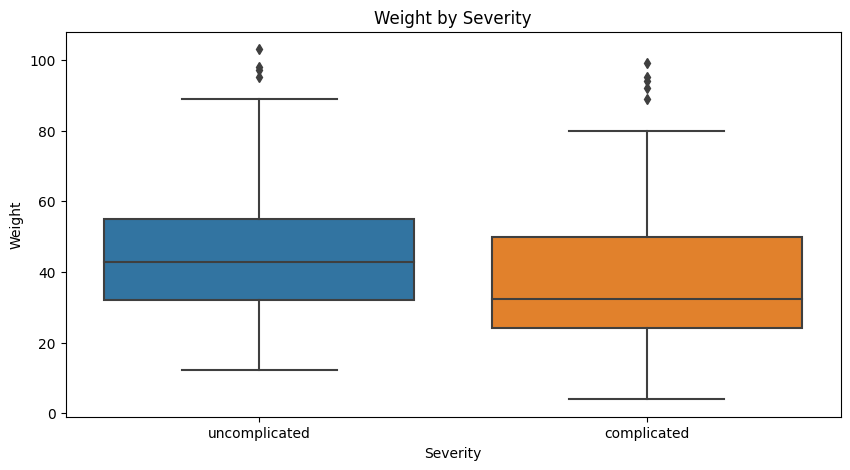


=== Length_of_Stay Segmented analysis ===


<Figure size 1000x600 with 0 Axes>

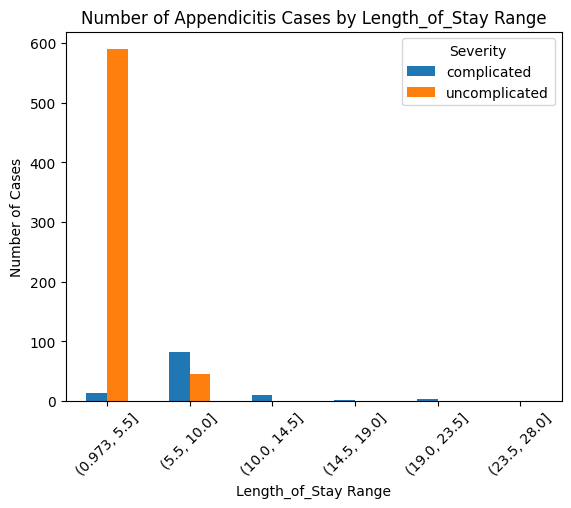

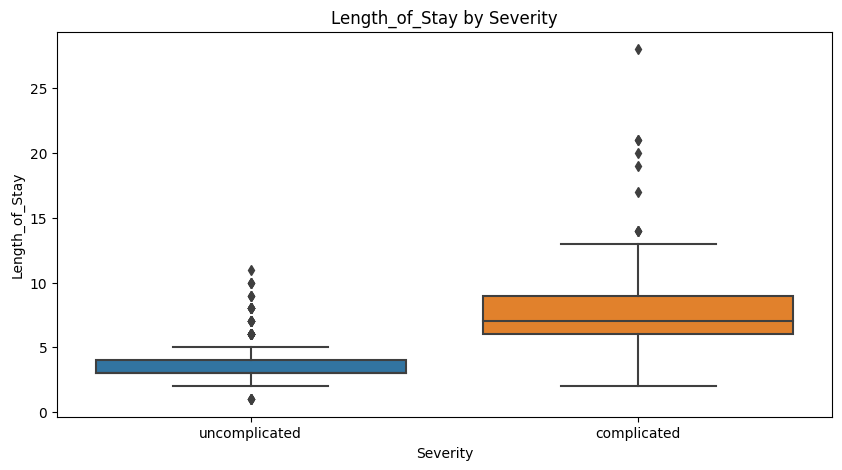

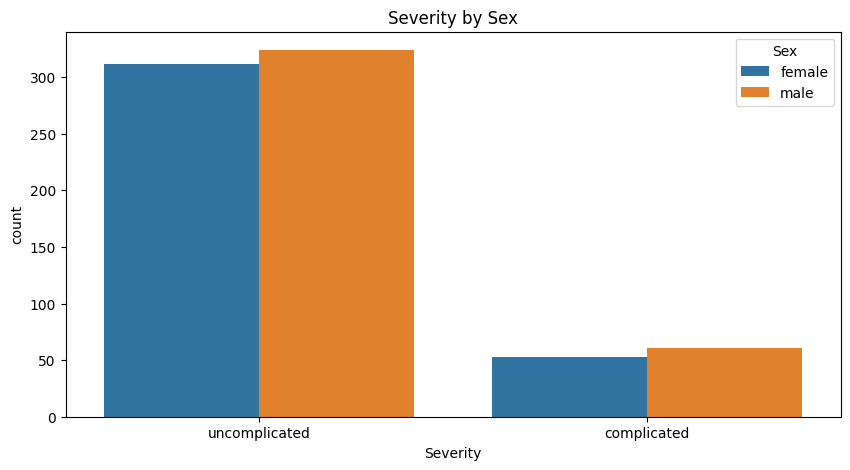

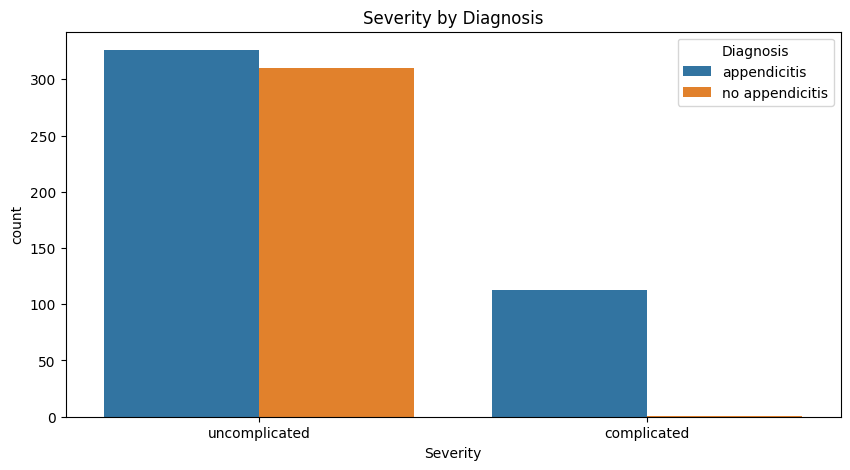

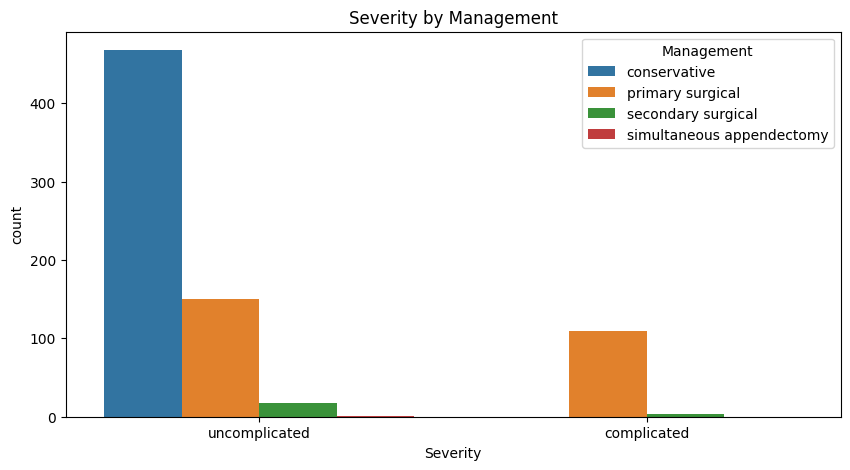

In [112]:
num_cols = ['Age','BMI','Height','Weight','Length_of_Stay']
for num in num_cols:
    print(f"\n=== {num} Segmented analysis ===")
    data_copy = data.copy()
    data_copy.loc[:,f'{num}_bin'] = pd.cut(data_copy[num], bins=6)
    counts = data_copy.groupby([f'{num}_bin', 'Severity']).size().unstack().fillna(0)
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Number of Appendicitis Cases by {num} Range')
    plt.xlabel(f'{num} Range')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.legend(title='Severity')
    plt.show()
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Severity', y=num, data=data)
    plt.title(f'{num} by Severity')
    plt.show()


for cat in ['Sex','Diagnosis' ,'Management']:
    plt.figure(figsize=(10,5))
    sns.countplot(x='Severity', hue=cat, data=data)
    plt.title(f'Severity by {cat}')
    plt.show()

Patient characteristics vs Length of stay

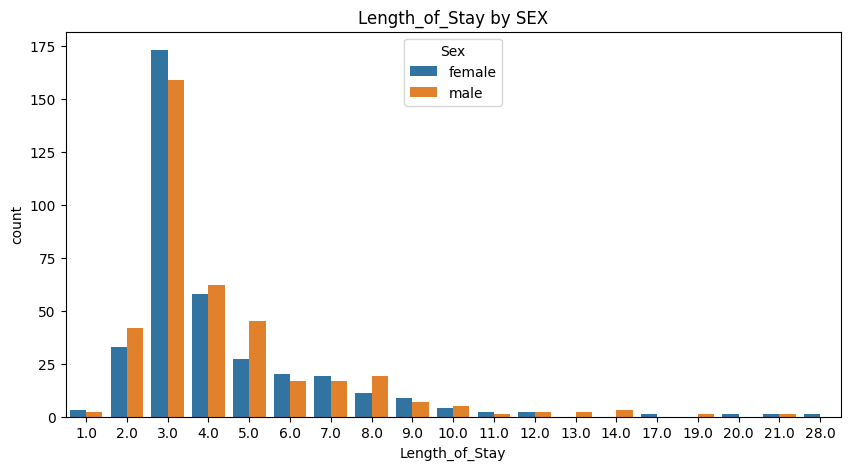

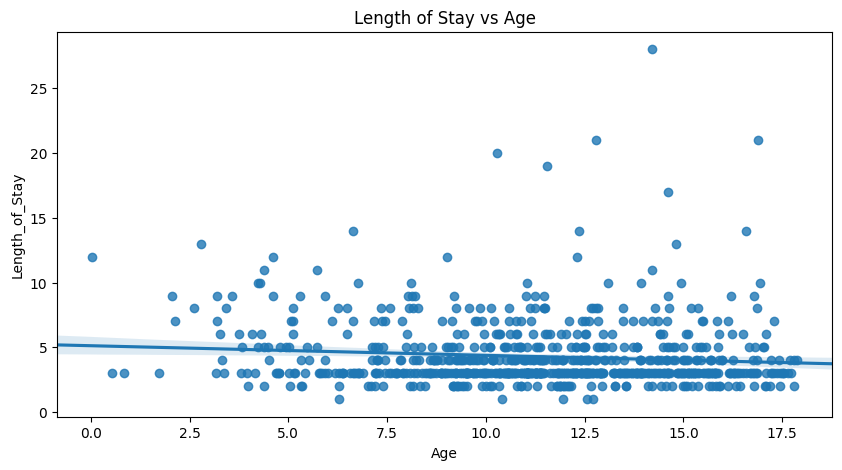

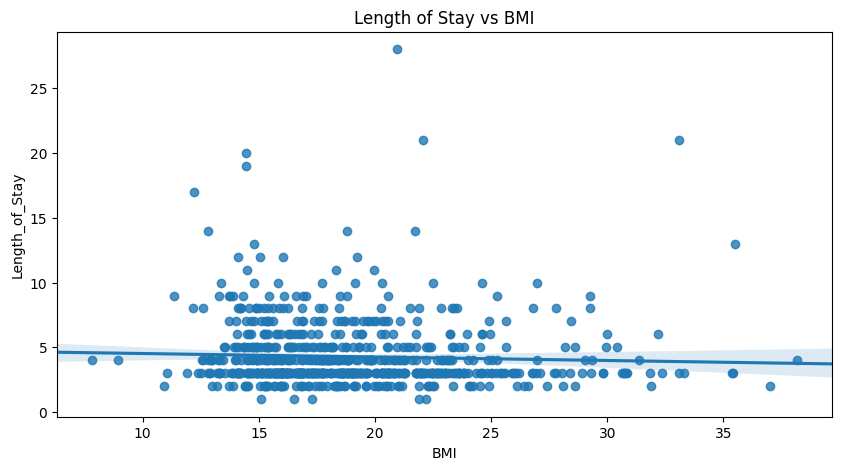

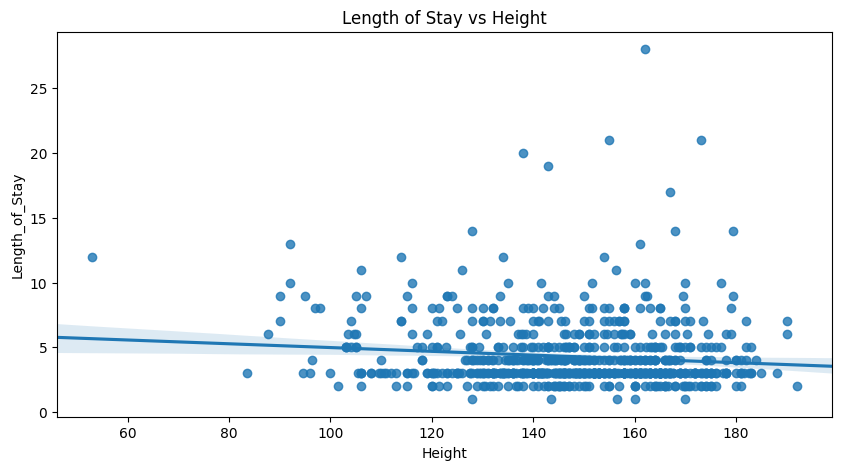

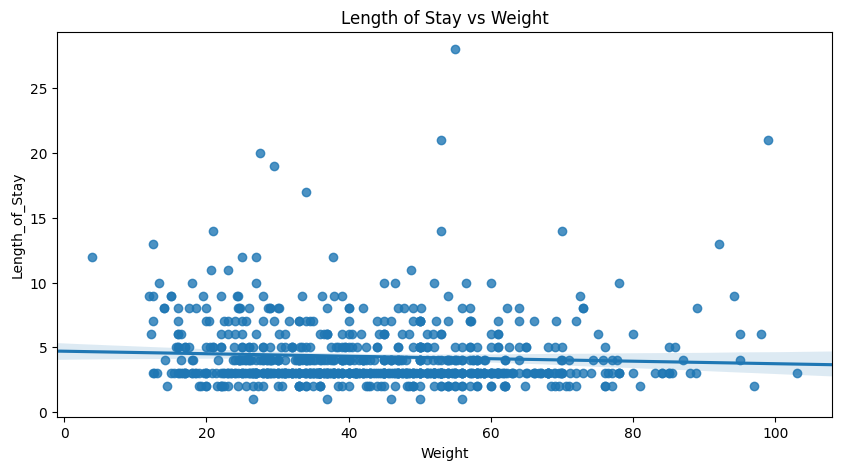

In [113]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="scipy.stats")
plt.figure(figsize=(10,5))
sns.countplot(x='Length_of_Stay', hue='Sex', data=data)
plt.title(f'Length_of_Stay by SEX')
plt.show()
for num in ['Age','BMI','Height','Weight']:
    plt.figure(figsize=(10,5))
    sns.regplot(x=num, y='Length_of_Stay', data=data)
    plt.title(f'Length of Stay vs {num}')
    plt.show()



# correlation matrix

In [115]:

cols = ['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Sex', 'Diagnosis', 'Management','Severity']
data_subset = data[cols].copy()
cat_order = {
    'Diagnosis': ['no appendicitis','appendicitis'],
    'Management': ['conservative','primary surgical','secondary surgical','simultaneous appendectomy'],  # 举例
    'Sex': ['female', 'male'],
    'Severity':['uncomplicated','complicated']
}

for col in ['Sex', 'Diagnosis', 'Management','Severity']:
    if data_subset[col].dtype == 'object':
        data_subset[col] = pd.Categorical(
            data_subset[col],
            categories=cat_order[col],
            ordered=True
        ).codes
data_subset.head()

,Age,BMI,Height,Weight,Length_of_Stay,Sex,Diagnosis,Management,Severity
0,12.68,16.9,148.0,37.0,3.0,0,1,0,0
1,11.08,16.9,163.0,45.0,3.0,0,1,0,0
2,14.34,14.9,174.0,45.5,3.0,1,1,0,0
3,11.87,15.7,147.0,34.0,2.0,1,1,0,0
4,15.98,19.7,164.0,53.0,4.0,0,1,0,0


In [116]:

correlation = data_subset.corr()

print(correlation.round(2))

                 Age   BMI  Height  Weight  Length_of_Stay   Sex  Diagnosis  \
Age             1.00  0.48    0.87    0.77           -0.10 -0.18      -0.08   
BMI             0.48  1.00    0.46    0.86           -0.05 -0.11      -0.12   
Height          0.87  0.46    1.00    0.83           -0.11 -0.09      -0.06   
Weight          0.77  0.86    0.83    1.00           -0.06 -0.11      -0.10   
Length_of_Stay -0.10 -0.05   -0.11   -0.06            1.00  0.02       0.39   
Sex            -0.18 -0.11   -0.09   -0.11            0.02  1.00       0.11   
Diagnosis      -0.08 -0.12   -0.06   -0.10            0.39  0.11       1.00   
Management     -0.09 -0.10   -0.10   -0.10            0.56  0.06       0.59   
Severity       -0.16 -0.10   -0.15   -0.11            0.67  0.02       0.35   

                Management  Severity  
Age                  -0.09     -0.16  
BMI                  -0.10     -0.10  
Height               -0.10     -0.15  
Weight               -0.10     -0.11  
Length_of_Stay

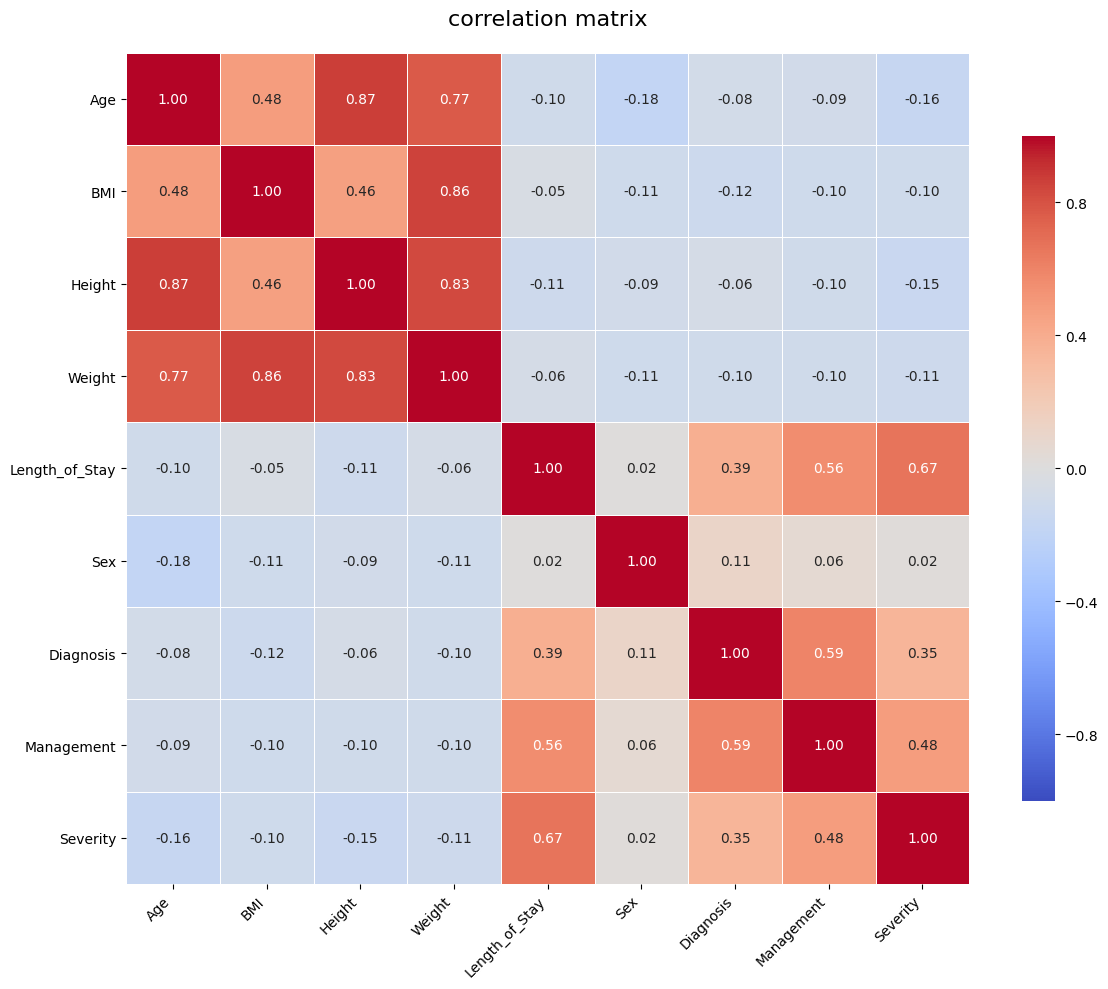

In [117]:
plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(correlation,
                     annot=True,
                     fmt=".2f",
                     cmap='coolwarm',
                     vmin=-1,
                     vmax=1,
                     center=0,
                     linewidths=.5,
                     cbar_kws={"shrink": 0.8})

plt.title('correlation matrix', pad=20, fontsize=16)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [118]:
# export notebook results to html
!jupyter nbconvert --to html demographic.ipynb

[NbConvertApp] Converting notebook demographic.ipynb to html
[NbConvertApp] Writing 3259683 bytes to demographic.html
